
- Autoregression (AR)
- Moving Average (MA)
- Autoregressive Moving Average (ARMA)
- Autoregressive Integrated Moving Average (ARIMA)
- Seasonal Autoregressive Integrated Moving-Average (SARIMA)
- Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
- Vector Autoregression (VAR)
- Vector Autoregression Moving-Average (VARMA)
- Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
- Simple Exponential Smoothing (SES)
- Holt Winter’s Exponential Smoothing (HWES)



## Autoregression (AR)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

https://otexts.com/fpp2/AR.html


In [3]:

# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]  #random() produces 0 to 1 number
print(data)

# fit model
model = AR(data)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data)+10) #predict(params[, start, end, dynamic])

print(yhat)


[1.588385060480073, 2.1094606935962843, 3.711675795935854, 4.7051222168757425, 5.190774063428789, 6.3208176430876755, 7.66125035441305, 8.709707011490023, 9.391023095162094, 10.072634850734044, 11.443694693641499, 12.174137369828449, 13.822834093696283, 14.328427102970592, 15.483277049201341, 16.773227744619895, 17.03412299873608, 18.920070356500187, 19.91478722377724, 20.65109935876792, 21.919794104169764, 22.058472318674703, 23.1169400268189, 24.77400753652101, 25.03429740201579, 26.65354171780052, 27.10115385203375, 28.89850287694405, 29.962331422137165, 30.9418283469896, 31.615823566673967, 32.3614065690525, 33.48754294838964, 34.355110078065096, 35.162517243152834, 36.47125261949466, 37.52389855340011, 38.25771945017694, 39.06163457738444, 40.412706500107284, 41.41237042643704, 42.82734189461115, 43.77772874505718, 44.26899800078238, 45.11364241930262, 46.99680969352866, 47.150758921308224, 48.66596729342754, 49.21939185685246, 50.55463910149254, 51.21306389573034, 52.761088850237

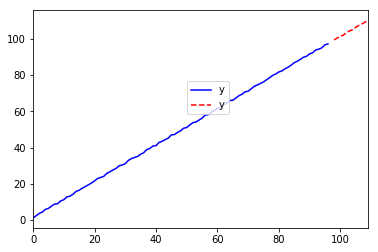

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame({"y" : data})
df1 = pd.DataFrame({"y" : yhat})

df2 = df.append(df1, ignore_index = True) 

ax = df2.iloc[:97,:].plot(ls="-", color="b")
df2.iloc[98:,:].plot(ls="--", color="r", ax=ax)

ax.legend(loc='lower right', bbox_to_anchor=(0.6,0.5))
plt.show()

## Autoregressive Moving Average (ARMA)

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and resiudal errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

In [22]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]

# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+10)
print(yhat)

[0.53069371 0.4494257  0.48243237 0.46912004 0.47451591 0.47233652
 0.47321899 0.4728623  0.47300666 0.47294829 0.47297191]


## Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components

In [4]:

# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random

# contrived dataset
data = [random() for x in range(1, 100)]

# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)

# make prediction
yhat = model_fit.predict(len(data), len(data)+10, typ='levels')
print(yhat)


[0.53228207 0.52127343 0.52164969 0.52148063 0.5213377  0.52119351
 0.52104938 0.52090525 0.52076112 0.52061699 0.52047286]


## Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

```{ s_{t}=\alpha . x_{t-1}+(1-alpha ). s_{t-1}  =   s_{t-1}+\alpha . (x_{t-1}-s_{t-1})}```

The method is suitable for univariate time series without trend and seasonal components.

In [26]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data)+10)
print(yhat)

[99.64284686 99.64284686 99.64284686 99.64284686 99.64284686 99.64284686
 99.64284686 99.64284686 99.64284686 99.64284686 99.64284686]
